In [3]:
 # Create a molecule fingerprint database from smiles

import pandas as pd
import sqlite3
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

def read_smiles_from_csv(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    return df['SMILES'].tolist()

def calculate_fingerprint(smiles):
    # Convert SMILES string to molecular object
    mol = Chem.MolFromSmiles(smiles)
    # Generate molecular fingerprint
    fp = FingerprintMols.FingerprintMol(mol)
    # Convert fingerprint to binary format
    return fp.ToBitString()

def insert_fingerprints_to_db(db_name, smiles_list):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # Create table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS molecules (
            id INTEGER PRIMARY KEY,
            smiles TEXT,
            fingerprint TEXT
        )
    ''')
    
    # Insert SMILES and fingerprints into the database
    for smiles in smiles_list:
        fingerprint = calculate_fingerprint(smiles)
        cursor.execute('''
            INSERT INTO molecules (smiles, fingerprint)
            VALUES (?, ?)
        ''', (smiles, fingerprint))
    
    conn.commit()
    conn.close()

def calculate_tanimoto(fp1, fp2):
    # Convert fingerprint strings back to RDKit fingerprints
    fp1 = DataStructs.CreateFromBitString(fp1)
    fp2 = DataStructs.CreateFromBitString(fp2)
    # Calculate Tanimoto similarity
    return DataStructs.FingerprintSimilarity(fp1, fp2)

def find_similar_molecules(db_name, input_smiles, threshold=0.7):
    input_fp = calculate_fingerprint(input_smiles)
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # Retrieve all fingerprints from the database
    cursor.execute('SELECT smiles, fingerprint FROM molecules')
    rows = cursor.fetchall()
    
    similar_molecules = []
    for smiles, fingerprint in rows:
        similarity = calculate_tanimoto(input_fp, fingerprint)
        if similarity >= threshold:
            similar_molecules.append((smiles, similarity))
    
    conn.close()
    return similar_molecules

def write_similar_molecules_to_csv(similar_molecules, output_file):
    # Convert list of tuples to DataFrame
    df = pd.DataFrame(similar_molecules, columns=['SMILES', 'Similarity'])
    # Write DataFrame to CSV file
    df.to_csv(output_file, index=False)

# Example usage
file_path = 'asinex.csv'  # Path to your CSV file
smiles_list = read_smiles_from_csv(file_path)
db_name = 'asinex.db'  # Name of the SQLite database

# Insert molecular fingerprints into the database
insert_fingerprints_to_db(db_name, smiles_list)


print(f'Databse created {db_name}')

Databse created asinex.db


In [2]:
import pandas as pd
import sqlite3
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

def read_smiles_from_csv(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    return df['SMILES'].tolist()

def calculate_fingerprint(smiles):
    # Convert SMILES string to molecular object
    mol = Chem.MolFromSmiles(smiles)
    # Generate molecular fingerprint
    fp = FingerprintMols.FingerprintMol(mol)
    # Convert fingerprint to binary format
    return fp.ToBitString()

def calculate_tanimoto(fp1, fp2):
    # Convert fingerprint strings back to RDKit fingerprints
    fp1 = DataStructs.CreateFromBitString(fp1)
    fp2 = DataStructs.CreateFromBitString(fp2)
    # Calculate Tanimoto similarity
    return DataStructs.FingerprintSimilarity(fp1, fp2)

def find_similar_molecules(db_name, input_smiles, threshold=0.7):
    input_fp = calculate_fingerprint(input_smiles)
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # Retrieve all fingerprints from the database
    cursor.execute('SELECT smiles, fingerprint FROM molecules')
    rows = cursor.fetchall()
    
    similar_molecules = []
    for smiles, fingerprint in rows:
        similarity = calculate_tanimoto(input_fp, fingerprint)
        if similarity >= threshold:
            similar_molecules.append((smiles, similarity))
    
    conn.close()
    return similar_molecules

def write_similar_molecules_to_csv(similar_molecules, output_file):
    # Convert list of tuples to DataFrame
    df = pd.DataFrame(similar_molecules, columns=['SMILES', 'Similarity'])
    # Write DataFrame to CSV file
    df.to_csv(output_file, index=False)

# Example usage
db_name = 'molecules.db'  # Name of the existing SQLite database

# Input SMILES
input_smiles = input('Enter the input SMILES string: ')

# Set similarity threshold
threshold = float(input('Enter the similarity threshold (0.0 to 1.0): '))

# Find similar molecules
similar_molecules = find_similar_molecules(db_name, input_smiles, threshold)

# Write similar molecules to a CSV file
output_file = 'similar_molecules.csv'
write_similar_molecules_to_csv(similar_molecules, output_file)

print(f'Similar molecules and their similarities have been written to {output_file}')

Enter the input SMILES string:  Cc1cccc(N(C(c2cccs2)=Nc2c3cccc2)C3=O)c1
Enter the similarity threshold (0.0 to 1.0):  0.8


Similar molecules and their similarities have been written to similar_molecules.csv


Enter the input SMILES string:  Cc1cc(C)c2c(N)csc2n1
Enter the similarity threshold (0.0 to 1.0):  0.4


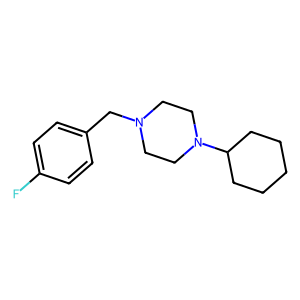

SMILES: Fc1ccc(CN(CC2)CCN2C2CCCCC2)cc1, Similarity: 0.44298245614035087


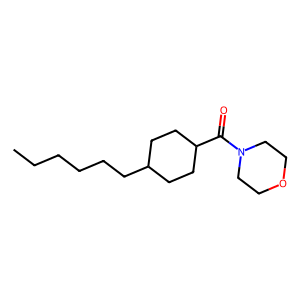

SMILES: CCCCCCC(CC1)CCC1C(N1CCOCC1)=O, Similarity: 0.4113785557986871


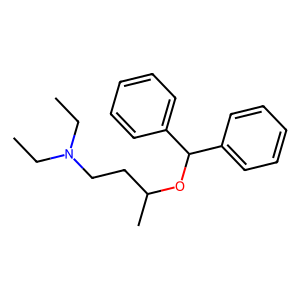

SMILES: CCN(CC)CCC(C)OC(c1ccccc1)c1ccccc1, Similarity: 0.4258064516129032


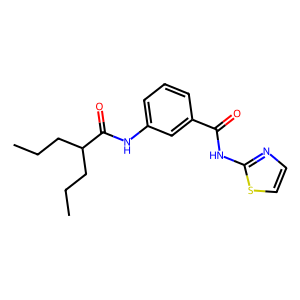

SMILES: CCCC(CCC)C(Nc1cccc(C(Nc2nccs2)=O)c1)=O, Similarity: 0.41796875


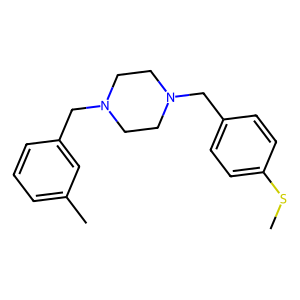

SMILES: Cc1cccc(CN2CCN(Cc(cc3)ccc3SC)CC2)c1, Similarity: 0.40848214285714285


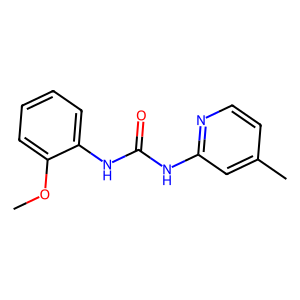

SMILES: Cc1cc(NC(Nc(cccc2)c2OC)=O)ncc1, Similarity: 0.4085872576177285


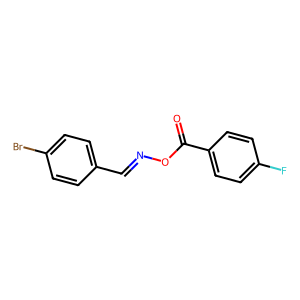

SMILES: O=C(c(cc1)ccc1F)O/N=C/c(cc1)ccc1Br, Similarity: 0.46238938053097345


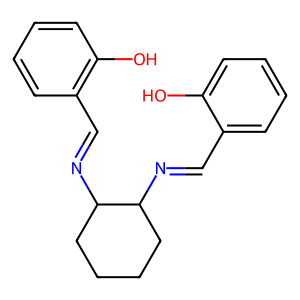

SMILES: Oc1c(/C=N/C(CCCC2)C2/N=C/c(cccc2)c2O)cccc1, Similarity: 0.4801762114537445


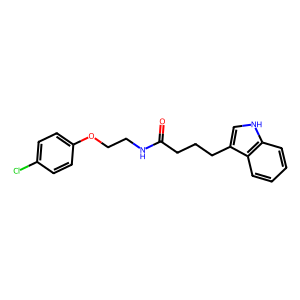

SMILES: O=C(CCCc1c[nH]c2c1cccc2)NCCOc(cc1)ccc1Cl, Similarity: 0.40264900662251657


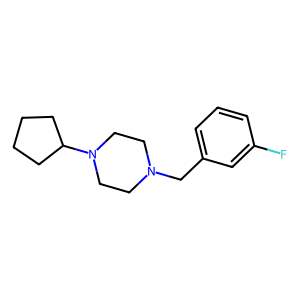

SMILES: Fc1cc(CN(CC2)CCN2C2CCCC2)ccc1, Similarity: 0.45054945054945056


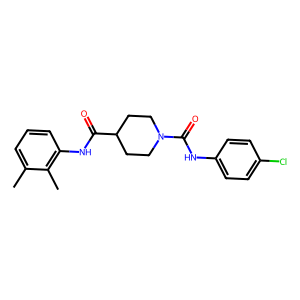

SMILES: Cc1cccc(NC(C(CC2)CCN2C(Nc(cc2)ccc2Cl)=O)=O)c1C, Similarity: 0.41688311688311686


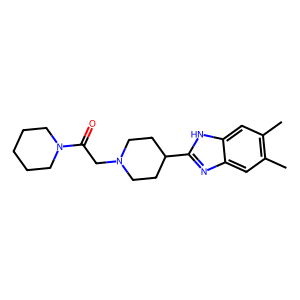

SMILES: Cc(c(C)c1)cc2c1nc(C1CCN(CC(N3CCCCC3)=O)CC1)[nH]2, Similarity: 0.40824468085106386


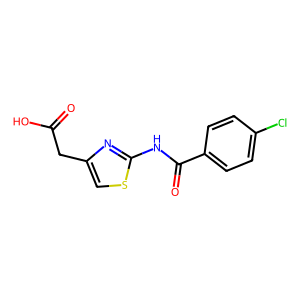

SMILES: OC(Cc1csc(NC(c(cc2)ccc2Cl)=O)n1)=O, Similarity: 0.4031620553359684


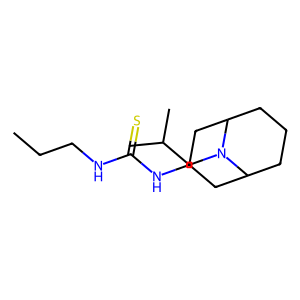

SMILES: CCCNC(NC1CC(CCC2)N(CC(C)C)C2C1)=S, Similarity: 0.40625


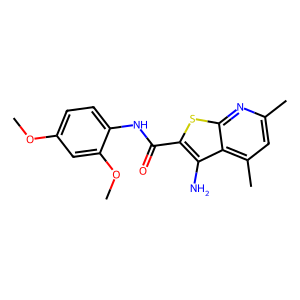

SMILES: Cc1c(c(N)c(C(Nc(ccc(OC)c2)c2OC)=O)s2)c2nc(C)c1, Similarity: 0.5609555189456342


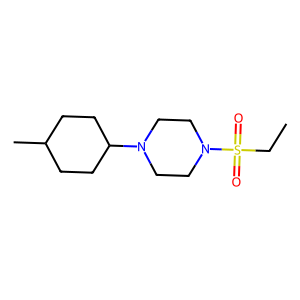

SMILES: CCS(N(CC1)CCN1C1CCC(C)CC1)(=O)=O, Similarity: 0.461038961038961


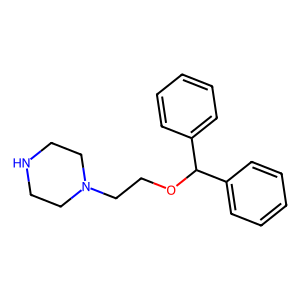

SMILES: C(COC(c1ccccc1)c1ccccc1)N1CCNCC1, Similarity: 0.4048140043763676


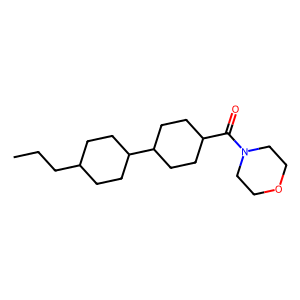

SMILES: CCCC(CC1)CCC1C(CC1)CCC1C(N1CCOCC1)=O, Similarity: 0.4223194748358862


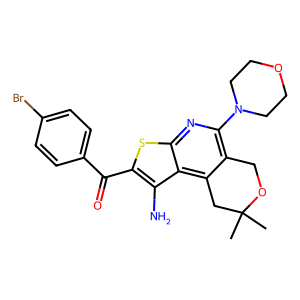

SMILES: CC(C)(C1)OCc(c(N2CCOCC2)n2)c1c1c2sc(C(c(cc2)ccc2Br)=O)c1N, Similarity: 0.4076154806491885


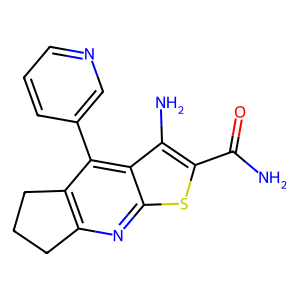

SMILES: NC(c(sc1nc(CCC2)c2c(-c2cnccc2)c11)c1N)=O, Similarity: 0.43272481406355645


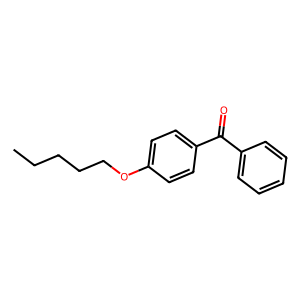

SMILES: CCCCCOc(cc1)ccc1C(c1ccccc1)=O, Similarity: 0.4139433551198257


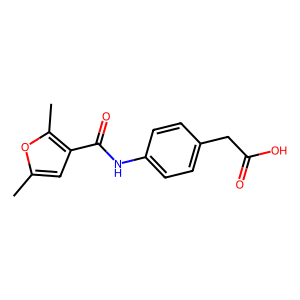

SMILES: Cc1cc(C(Nc2ccc(CC(O)=O)cc2)=O)c(C)o1, Similarity: 0.4083769633507853


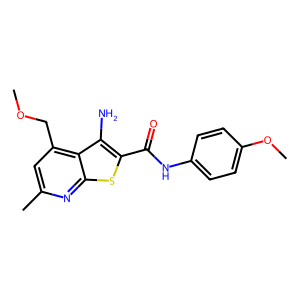

SMILES: Cc1cc(COC)c(c(N)c(C(Nc(cc2)ccc2OC)=O)s2)c2n1, Similarity: 0.5563725490196079


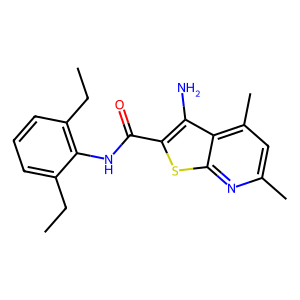

SMILES: CCc1cccc(CC)c1NC(c(sc1nc(C)cc(C)c11)c1N)=O, Similarity: 0.5727502102607233


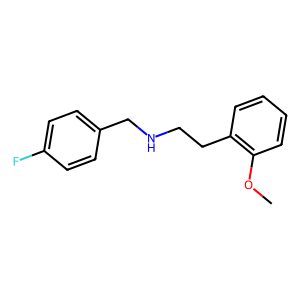

SMILES: COc1c(CCNCc(cc2)ccc2F)cccc1, Similarity: 0.46187363834422657


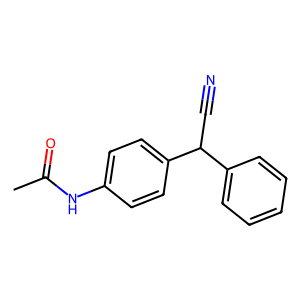

SMILES: CC(Nc1ccc(C(c2ccccc2)C#N)cc1)=O, Similarity: 0.4392935982339956


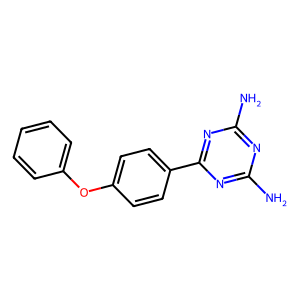

SMILES: Nc1nc(-c(cc2)ccc2Oc2ccccc2)nc(N)n1, Similarity: 0.4583333333333333


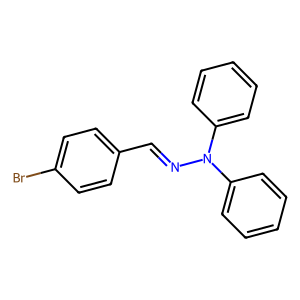

SMILES: Brc1ccc(/C=N/N(c2ccccc2)c2ccccc2)cc1, Similarity: 0.4663677130044843


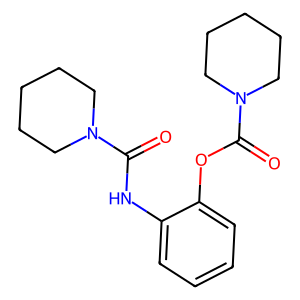

SMILES: O=C(Nc(cccc1)c1OC(N1CCCCC1)=O)N1CCCCC1, Similarity: 0.4090909090909091


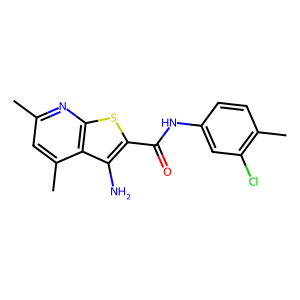

SMILES: Cc1cc(C)nc2c1c(N)c(C(Nc1cc(Cl)c(C)cc1)=O)s2, Similarity: 0.5850515463917526


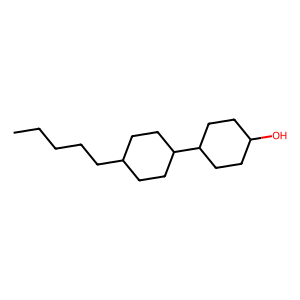

SMILES: CCCCCC(CC1)CCC1C(CC1)CCC1O, Similarity: 0.4765625


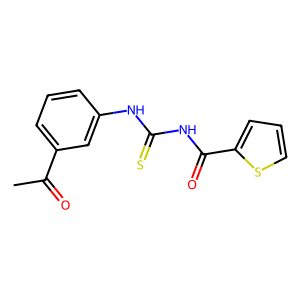

SMILES: CC(c1cccc(NC(NC(c2cccs2)=O)=S)c1)=O, Similarity: 0.41397849462365593


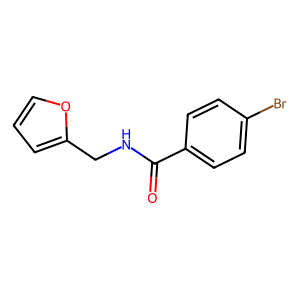

SMILES: O=C(c(cc1)ccc1Br)NCc1ccco1, Similarity: 0.47149122807017546


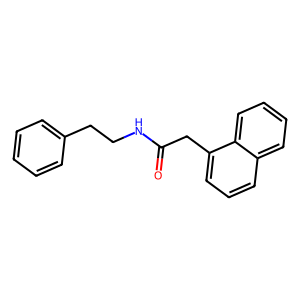

SMILES: O=C(Cc1cccc2ccccc12)NCCc1ccccc1, Similarity: 0.4157303370786517


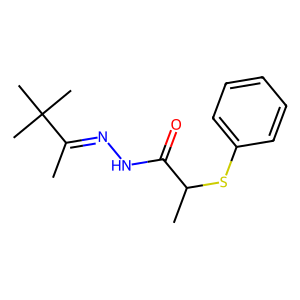

SMILES: CC(C(N/N=C(\C)/C(C)(C)C)=O)Sc1ccccc1, Similarity: 0.4307692307692308


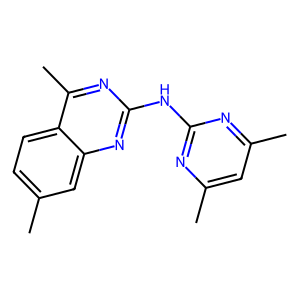

SMILES: Cc1ccc(c(C)nc(Nc2nc(C)cc(C)n2)n2)c2c1, Similarity: 0.4099722991689751


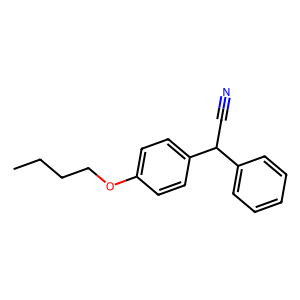

SMILES: CCCCOc1ccc(C(c2ccccc2)C#N)cc1, Similarity: 0.42764578833693306


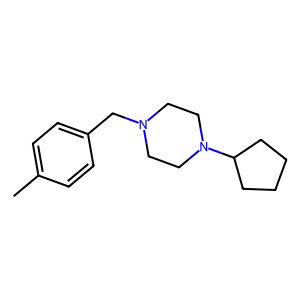

SMILES: Cc1ccc(CN(CC2)CCN2C2CCCC2)cc1, Similarity: 0.41870824053452116


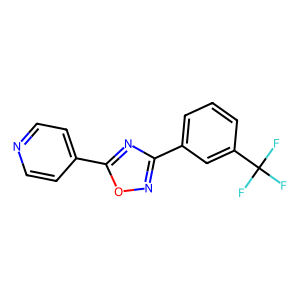

SMILES: FC(c1cc(-c2noc(-c3ccncc3)n2)ccc1)(F)F, Similarity: 0.41732283464566927


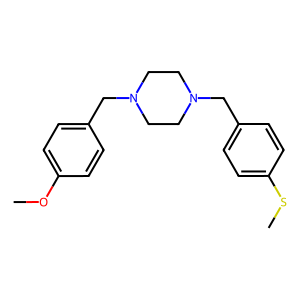

SMILES: COc1ccc(CN2CCN(Cc(cc3)ccc3SC)CC2)cc1, Similarity: 0.44759825327510916


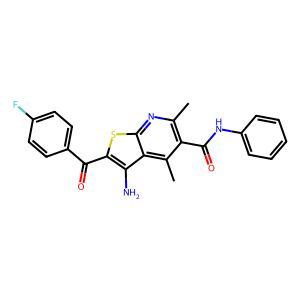

SMILES: Cc1c(c(N)c(C(c(cc2)ccc2F)=O)s2)c2nc(C)c1C(Nc1ccccc1)=O, Similarity: 0.49134199134199136


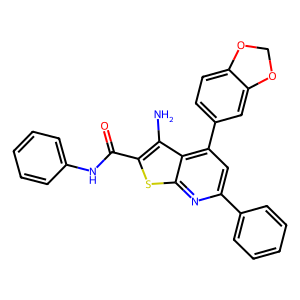

SMILES: Nc1c(C(Nc2ccccc2)=O)sc2nc(-c3ccccc3)cc(-c(cc3)cc4c3OCO4)c12, Similarity: 0.4


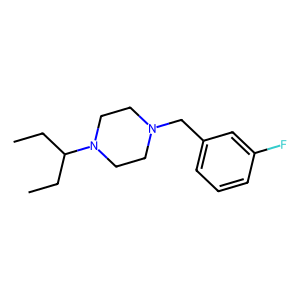

SMILES: CCC(CC)N1CCN(Cc2cccc(F)c2)CC1, Similarity: 0.423841059602649


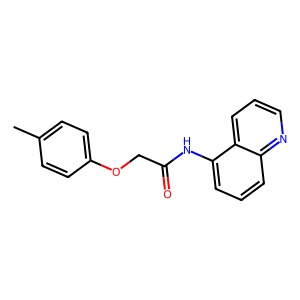

SMILES: Cc(cc1)ccc1OCC(Nc1cccc2ncccc12)=O, Similarity: 0.4371584699453552


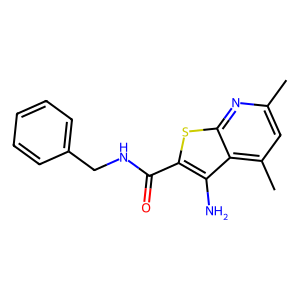

SMILES: Cc1c(c(N)c(C(NCc2ccccc2)=O)s2)c2nc(C)c1, Similarity: 0.6276497695852534


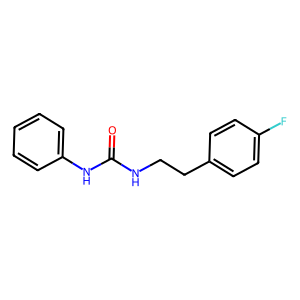

SMILES: O=C(NCCc(cc1)ccc1F)Nc1ccccc1, Similarity: 0.4336283185840708


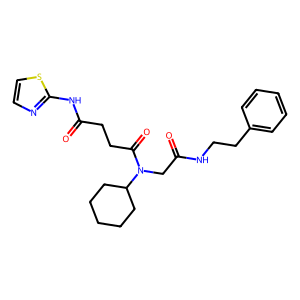

SMILES: O=C(CCC(N(CC(NCCc1ccccc1)=O)C1CCCCC1)=O)Nc1nccs1, Similarity: 0.4119205298013245


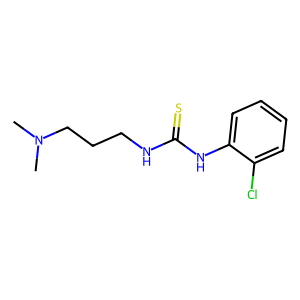

SMILES: CN(C)CCCNC(Nc(cccc1)c1Cl)=S, Similarity: 0.4567627494456763


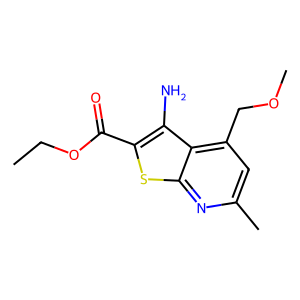

SMILES: CCOC(c(sc1nc(C)cc(COC)c11)c1N)=O, Similarity: 0.5968448729184925


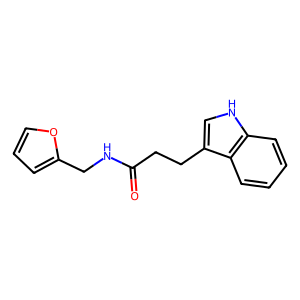

SMILES: O=C(CCc1c[nH]c2c1cccc2)NCc1ccco1, Similarity: 0.41415465268676277


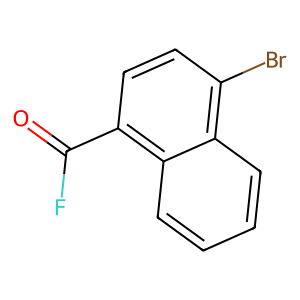

SMILES: O=C(c(c1ccccc11)ccc1Br)F, Similarity: 0.453125


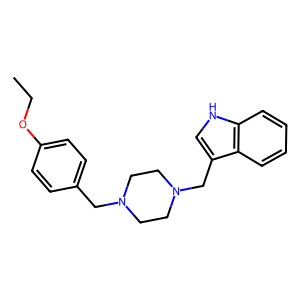

SMILES: CCOc1ccc(CN2CCN(Cc3c[nH]c4c3cccc4)CC2)cc1, Similarity: 0.40053763440860213


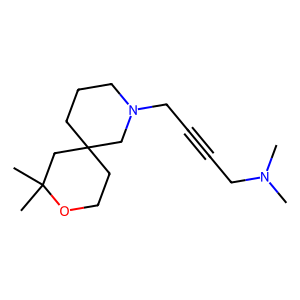

SMILES: CC(C)(C1)OCCC11CN(CC#CCN(C)C)CCC1, Similarity: 0.44685466377440347


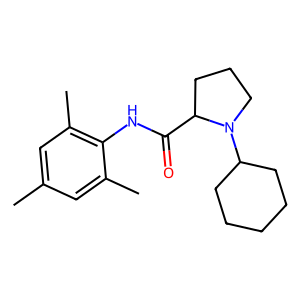

SMILES: Cc(cc1C)cc(C)c1NC(C(CCC1)N1C1CCCCC1)=O, Similarity: 0.40568475452196384


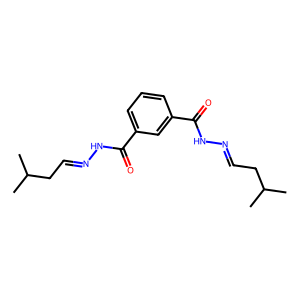

SMILES: CC(C)C/C=N/NC(c1cccc(C(N/N=C/CC(C)C)=O)c1)=O, Similarity: 0.4144736842105263


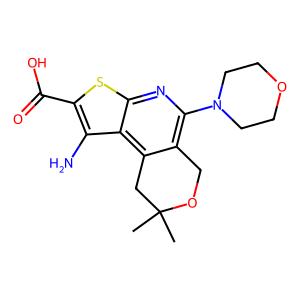

SMILES: CC(C)(Cc1c23)OCc1c(N1CCOCC1)nc2sc(C(O)=O)c3N, Similarity: 0.4217024041585445


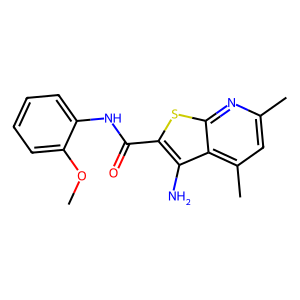

SMILES: Cc1c(c(N)c(C(Nc(cccc2)c2OC)=O)s2)c2nc(C)c1, Similarity: 0.575168918918919


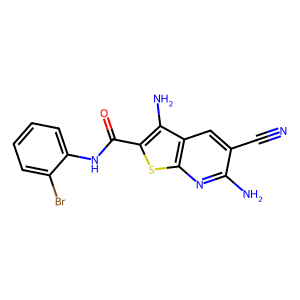

SMILES: Nc1c(C(Nc(cccc2)c2Br)=O)sc(nc2N)c1cc2C#N, Similarity: 0.4439178515007899


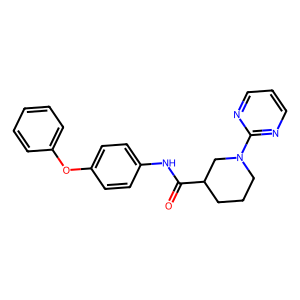

SMILES: O=C(C(CCC1)CN1c1ncccn1)Nc(cc1)ccc1Oc1ccccc1, Similarity: 0.4033290653008963


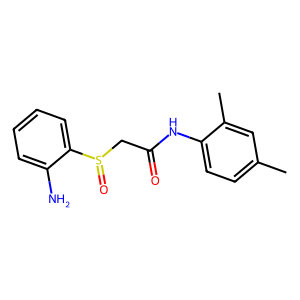

SMILES: Cc(cc1)cc(C)c1NC(CS(c(cccc1)c1N)=O)=O, Similarity: 0.4


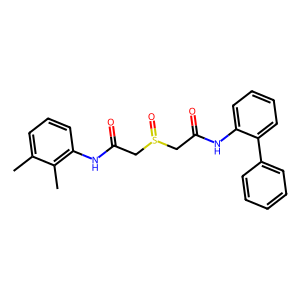

SMILES: Cc1cccc(NC(CS(CC(Nc(cccc2)c2-c2ccccc2)=O)=O)=O)c1C, Similarity: 0.4095112285336856


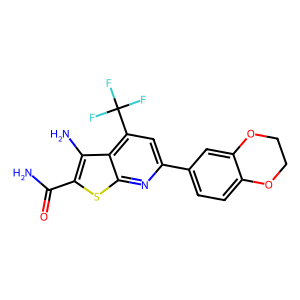

SMILES: NC(c(sc1nc(-c(cc2)cc3c2OCCO3)cc(C(F)(F)F)c11)c1N)=O, Similarity: 0.45894428152492667


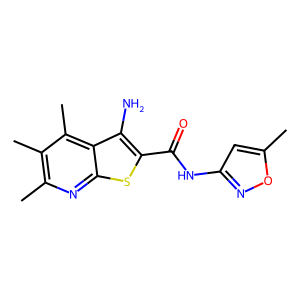

SMILES: Cc1cc(NC(c(sc2nc(C)c(C)c(C)c22)c2N)=O)no1, Similarity: 0.5383399209486166


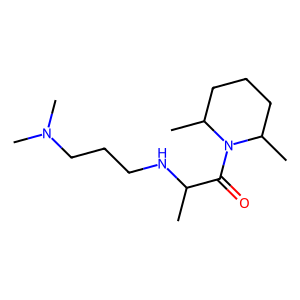

SMILES: CC(C(N1C(C)CCCC1C)=O)NCCCN(C)C, Similarity: 0.4336283185840708


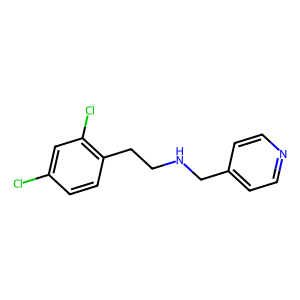

SMILES: Clc1cc(Cl)c(CCNCc2ccncc2)cc1, Similarity: 0.46651785714285715


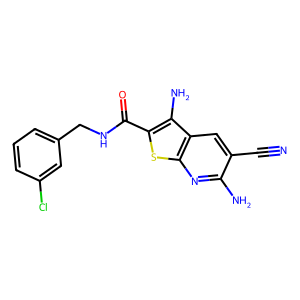

SMILES: Nc1c(C(NCc2cccc(Cl)c2)=O)sc(nc2N)c1cc2C#N, Similarity: 0.4505229283990346


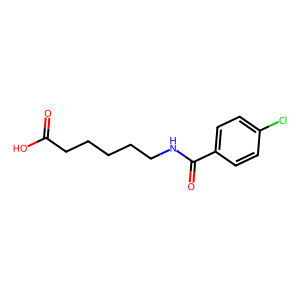

SMILES: OC(CCCCCNC(c(cc1)ccc1Cl)=O)=O, Similarity: 0.4304635761589404


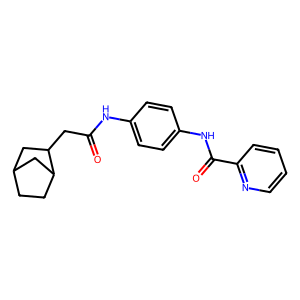

SMILES: O=C(CC1C(CC2)CC2C1)Nc(cc1)ccc1NC(c1ncccc1)=O, Similarity: 0.40456989247311825


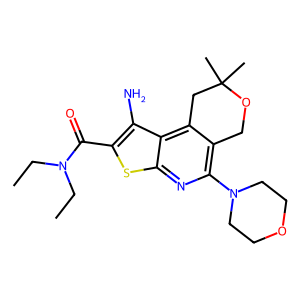

SMILES: CCN(CC)C(c(sc1nc(N2CCOCC2)c(COC(C)(C)C2)c2c11)c1N)=O, Similarity: 0.4118761844598863


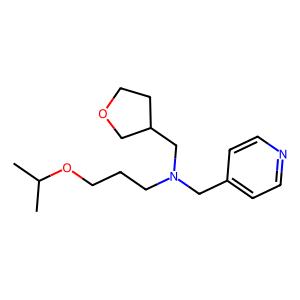

SMILES: CC(C)OCCCN(CC1COCC1)Cc1ccncc1, Similarity: 0.4392935982339956


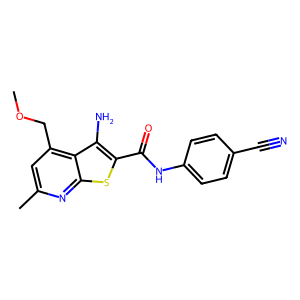

SMILES: Cc1cc(COC)c(c(N)c(C(Nc(cc2)ccc2C#N)=O)s2)c2n1, Similarity: 0.5637417218543046


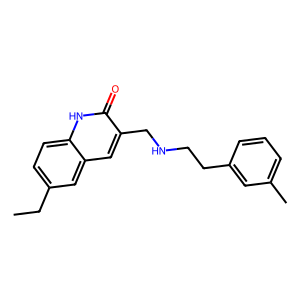

SMILES: CCc(cc1)cc(C=C2CNCCc3cc(C)ccc3)c1NC2=O, Similarity: 0.40186915887850466


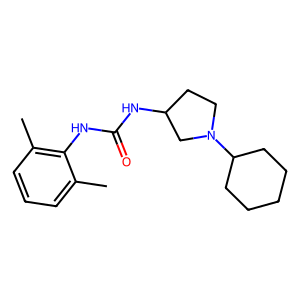

SMILES: Cc1cccc(C)c1NC(NC(CC1)CN1C1CCCCC1)=O, Similarity: 0.4065040650406504


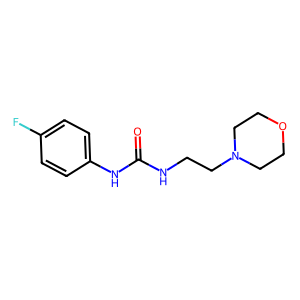

SMILES: O=C(NCCN1CCOCC1)Nc(cc1)ccc1F, Similarity: 0.44273127753303965


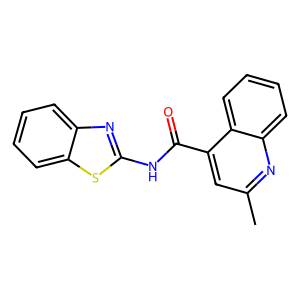

SMILES: Cc1nc2ccccc2c(C(Nc2nc(cccc3)c3s2)=O)c1, Similarity: 0.4056007226738934


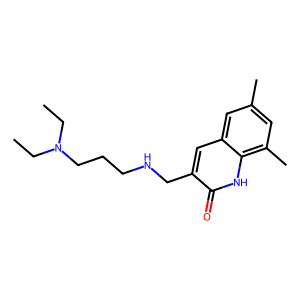

SMILES: CCN(CC)CCCNCC1=Cc(cc(C)cc2C)c2NC1=O, Similarity: 0.40878828229027964


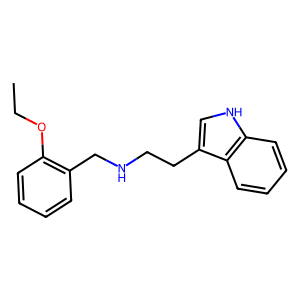

SMILES: CCOc1c(CNCCc2c[nH]c3c2cccc3)cccc1, Similarity: 0.4227212681638045


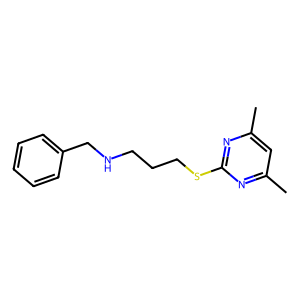

SMILES: Cc1nc(SCCCNCc2ccccc2)nc(C)c1, Similarity: 0.460352422907489


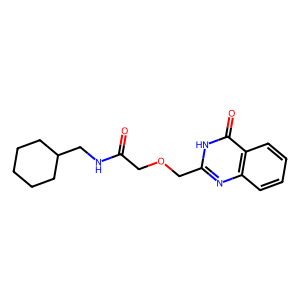

SMILES: O=C(COCC(N1)=Nc(cccc2)c2C1=O)NCC1CCCCC1, Similarity: 0.4094488188976378


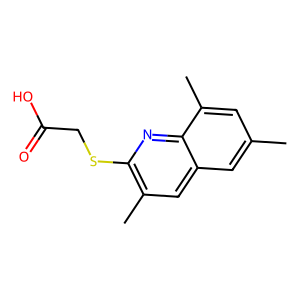

SMILES: Cc(cc1cc2C)cc(C)c1nc2SCC(O)=O, Similarity: 0.42533333333333334


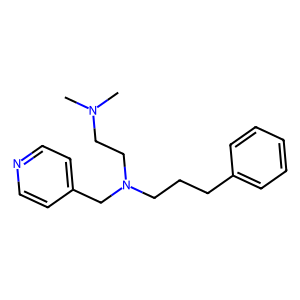

SMILES: CN(C)CCN(CCCc1ccccc1)Cc1ccncc1, Similarity: 0.43080357142857145


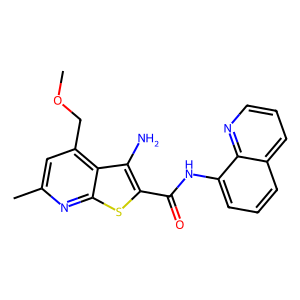

SMILES: Cc1cc(COC)c(c(N)c(C(Nc2cccc3cccnc23)=O)s2)c2n1, Similarity: 0.5234435049961568


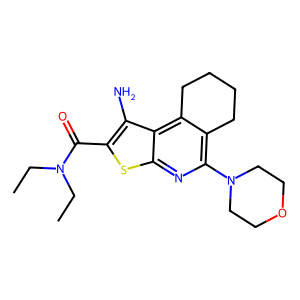

SMILES: CCN(CC)C(c(sc1nc(N2CCOCC2)c(CCCC2)c2c11)c1N)=O, Similarity: 0.4248841826604897


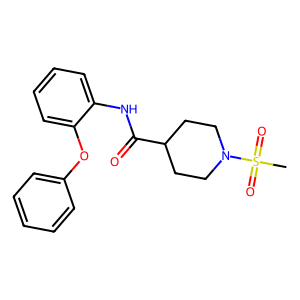

SMILES: CS(N(CC1)CCC1C(Nc(cccc1)c1Oc1ccccc1)=O)(=O)=O, Similarity: 0.4119170984455959


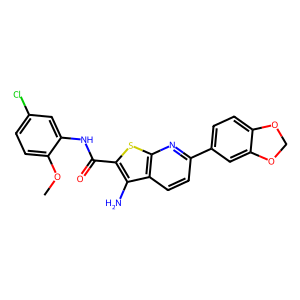

SMILES: COc(ccc(Cl)c1)c1NC(c(sc1c2ccc(-c(cc3)cc4c3OCO4)n1)c2N)=O, Similarity: 0.4108416547788873


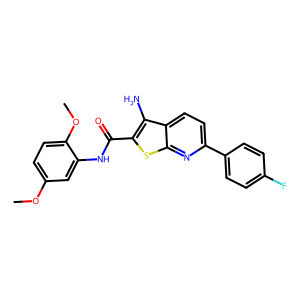

SMILES: COc(cc1)cc(NC(c(sc2nc(-c(cc3)ccc3F)ccc22)c2N)=O)c1OC, Similarity: 0.41964285714285715


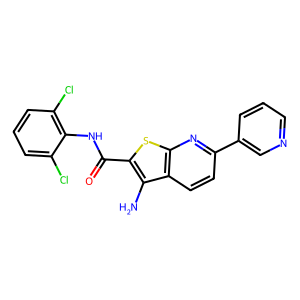

SMILES: Nc1c(C(Nc(c(Cl)ccc2)c2Cl)=O)sc2c1ccc(-c1cnccc1)n2, Similarity: 0.426279602750191


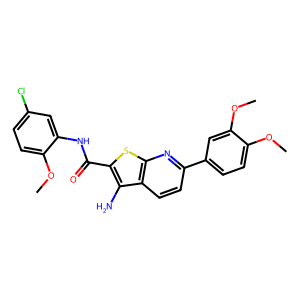

SMILES: COc(ccc(Cl)c1)c1NC(c(sc1c2ccc(-c(cc3)cc(OC)c3OC)n1)c2N)=O, Similarity: 0.41414141414141414


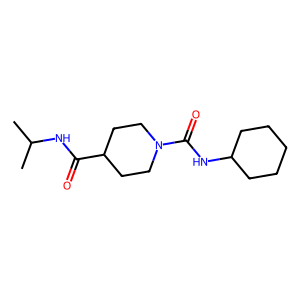

SMILES: CC(C)NC(C(CC1)CCN1C(NC1CCCCC1)=O)=O, Similarity: 0.4490238611713666


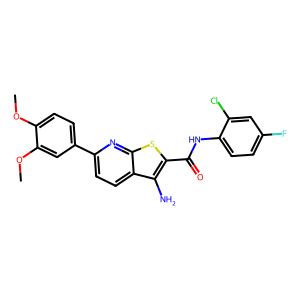

SMILES: COc(ccc(-c(cc1)nc2c1c(N)c(C(Nc(ccc(F)c1)c1Cl)=O)s2)c1)c1OC, Similarity: 0.4127906976744186


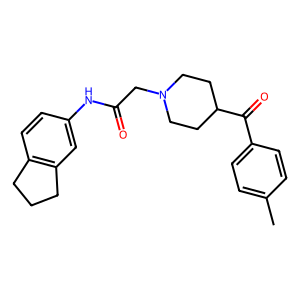

SMILES: Cc(cc1)ccc1C(C1CCN(CC(Nc2cc(CCC3)c3cc2)=O)CC1)=O, Similarity: 0.4067357512953368


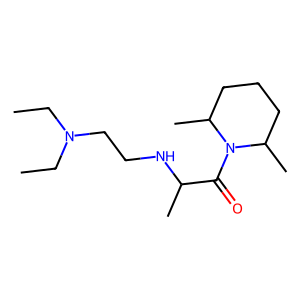

SMILES: CCN(CC)CCNC(C)C(N1C(C)CCCC1C)=O, Similarity: 0.4197802197802198


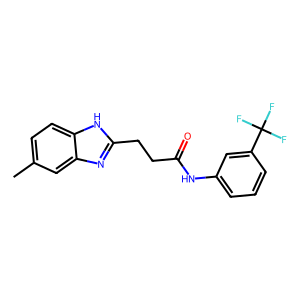

SMILES: Cc(cc1)cc2c1[nH]c(CCC(Nc1cccc(C(F)(F)F)c1)=O)n2, Similarity: 0.41842105263157897


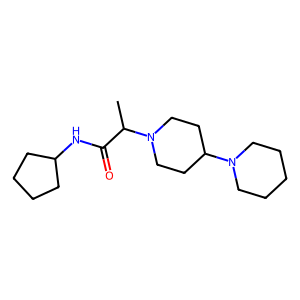

SMILES: CC(C(NC1CCCC1)=O)N(CC1)CCC1N1CCCCC1, Similarity: 0.4113785557986871


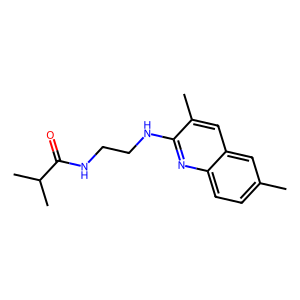

SMILES: CC(C)C(NCCNc1nc2ccc(C)cc2cc1C)=O, Similarity: 0.4240766073871409


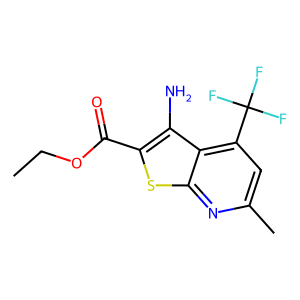

SMILES: CCOC(c(sc1nc(C)cc(C(F)(F)F)c11)c1N)=O, Similarity: 0.575168918918919


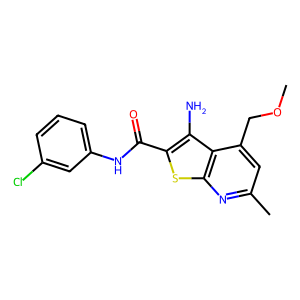

SMILES: Cc1nc(sc(C(Nc2cccc(Cl)c2)=O)c2N)c2c(COC)c1, Similarity: 0.5563725490196079


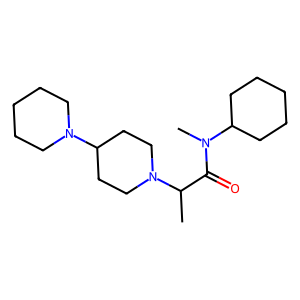

SMILES: CC(C(N(C)C1CCCCC1)=O)N(CC1)CCC1N1CCCCC1, Similarity: 0.46187363834422657


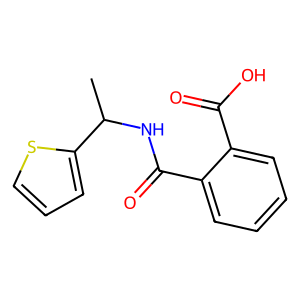

SMILES: CC(c1cccs1)NC(c(cccc1)c1C(O)=O)=O, Similarity: 0.40258064516129033


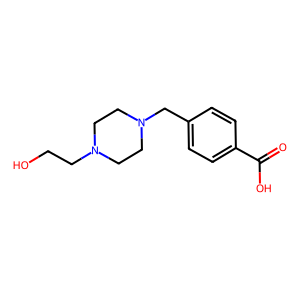

SMILES: OCCN1CCN(Cc(cc2)ccc2C(O)=O)CC1, Similarity: 0.43400447427293065


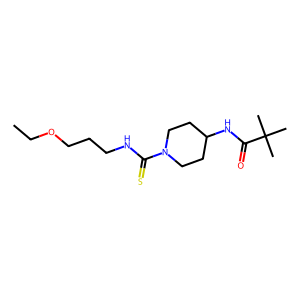

SMILES: CCOCCCNC(N(CC1)CCC1NC(C(C)(C)C)=O)=S, Similarity: 0.4360086767895879


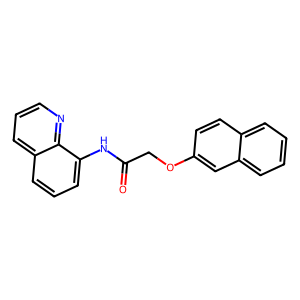

SMILES: O=C(COc1cc2ccccc2cc1)Nc1cccc2cccnc12, Similarity: 0.4023746701846966


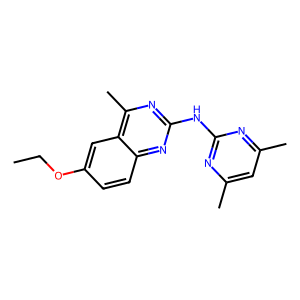

SMILES: CCOc1cc2c(C)nc(Nc3nc(C)cc(C)n3)nc2cc1, Similarity: 0.4244415243101183


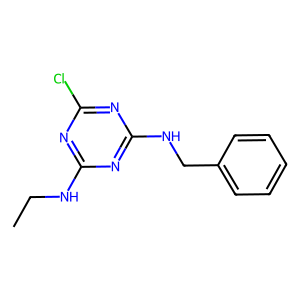

SMILES: CCNc1nc(Cl)nc(NCc2ccccc2)n1, Similarity: 0.46017699115044247


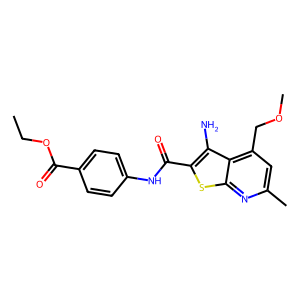

SMILES: CCOC(c(cc1)ccc1NC(c(sc1nc(C)cc(COC)c11)c1N)=O)=O, Similarity: 0.5469879518072289


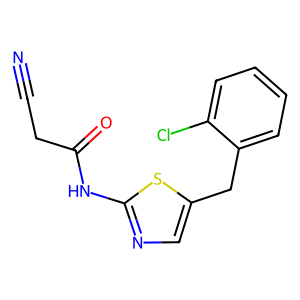

SMILES: N#CCC(Nc1ncc(Cc(cccc2)c2Cl)s1)=O, Similarity: 0.40077821011673154


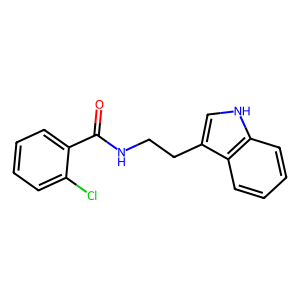

SMILES: O=C(c(cccc1)c1Cl)NCCc1c[nH]c2c1cccc2, Similarity: 0.4230769230769231


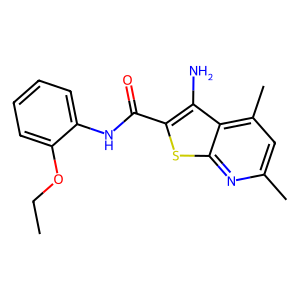

SMILES: CCOc(cccc1)c1NC(c(sc1nc(C)cc(C)c11)c1N)=O, Similarity: 0.5660847880299252


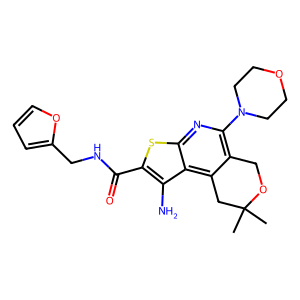

SMILES: CC(C)(Cc1c23)OCc1c(N1CCOCC1)nc2sc(C(NCc1ccco1)=O)c3N, Similarity: 0.40648379052369077


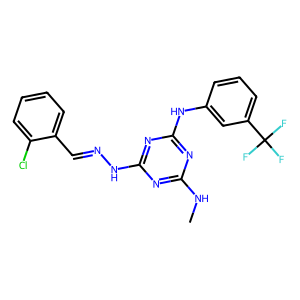

SMILES: CNc1nc(N/N=C/c(cccc2)c2Cl)nc(Nc2cc(C(F)(F)F)ccc2)n1, Similarity: 0.4026315789473684


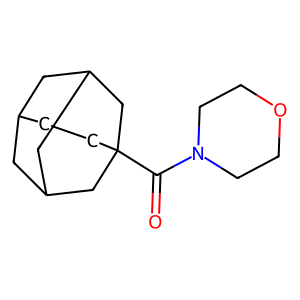

SMILES: O=C(C1(CC(C2)C3)CCC3CC2C1)N1CCOCC1, Similarity: 0.4470842332613391


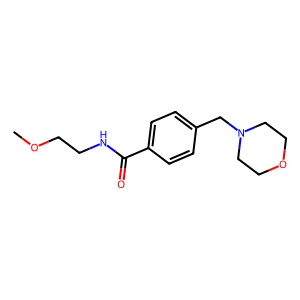

SMILES: COCCNC(c1ccc(CN2CCOCC2)cc1)=O, Similarity: 0.42417582417582417


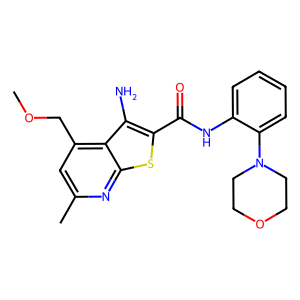

SMILES: Cc1cc(COC)c(c(N)c(C(Nc(cccc2)c2N2CCOCC2)=O)s2)c2n1, Similarity: 0.5198473282442748


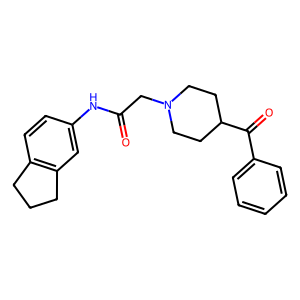

SMILES: O=C(CN(CC1)CCC1C(c1ccccc1)=O)Nc1cc(CCC2)c2cc1, Similarity: 0.4010416666666667


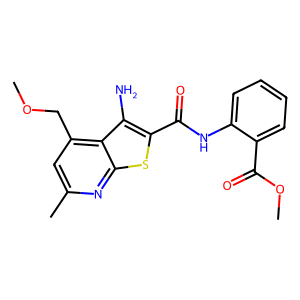

SMILES: Cc1cc(COC)c(c(N)c(C(Nc(cccc2)c2C(OC)=O)=O)s2)c2n1, Similarity: 0.5250578257517348


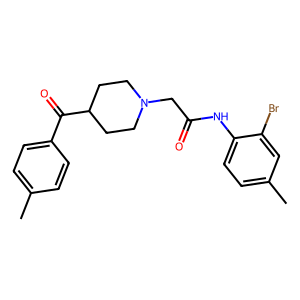

SMILES: Cc(cc1)ccc1C(C1CCN(CC(Nc(ccc(C)c2)c2Br)=O)CC1)=O, Similarity: 0.4070221066319896


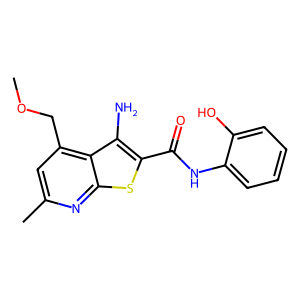

SMILES: Cc1cc(COC)c(c(N)c(C(Nc(cccc2)c2O)=O)s2)c2n1, Similarity: 0.5523114355231143


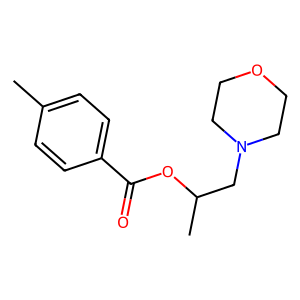

SMILES: CC(CN1CCOCC1)OC(c1ccc(C)cc1)=O, Similarity: 0.45253863134657835


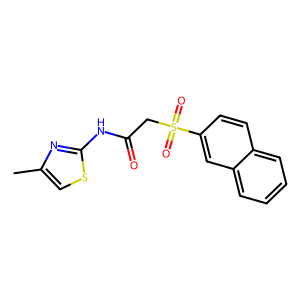

SMILES: Cc1csc(NC(CS(c2cc3ccccc3cc2)(=O)=O)=O)n1, Similarity: 0.403921568627451


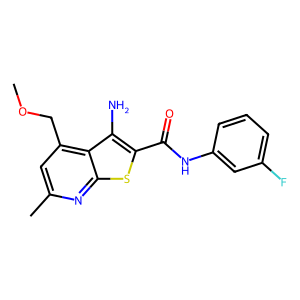

SMILES: Cc1cc(COC)c(c(N)c(C(Nc2cc(F)ccc2)=O)s2)c2n1, Similarity: 0.5568274734260016


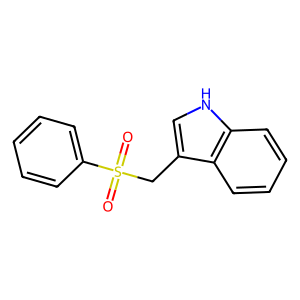

SMILES: O=S(Cc1c[nH]c2c1cccc2)(c1ccccc1)=O, Similarity: 0.418086500655308


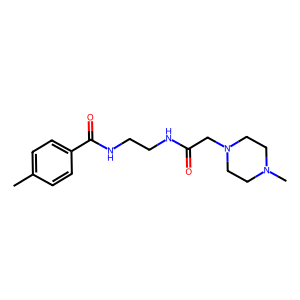

SMILES: Cc(cc1)ccc1C(NCCNC(CN1CCN(C)CC1)=O)=O, Similarity: 0.4307692307692308


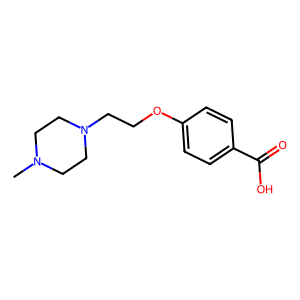

SMILES: CN1CCN(CCOc(cc2)ccc2C(O)=O)CC1, Similarity: 0.434878587196468


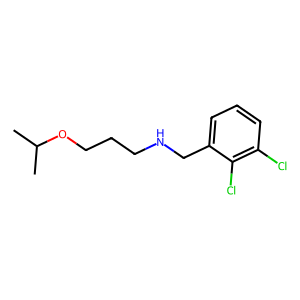

SMILES: CC(C)OCCCNCc1cccc(Cl)c1Cl, Similarity: 0.458980044345898


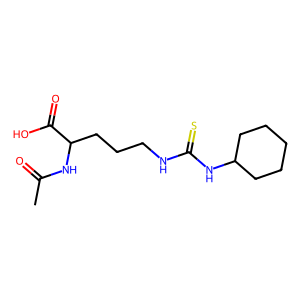

SMILES: CC(NC(CCCNC(NC1CCCCC1)=S)C(O)=O)=O, Similarity: 0.4747252747252747


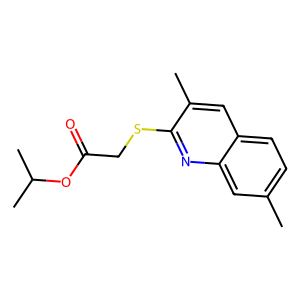

SMILES: CC(C)OC(CSc1nc2cc(C)ccc2cc1C)=O, Similarity: 0.4262948207171315


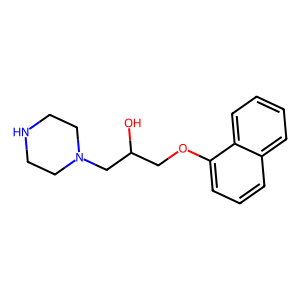

SMILES: OC(CN1CCNCC1)COc1cccc2ccccc12, Similarity: 0.46956521739130436


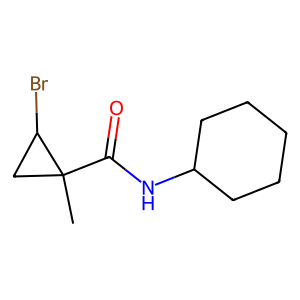

SMILES: CC(C1)(C1Br)C(NC1CCCCC1)=O, Similarity: 0.43171806167400884


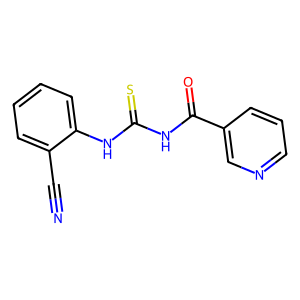

SMILES: N#Cc(cccc1)c1NC(NC(c1cnccc1)=O)=S, Similarity: 0.41278295605858856


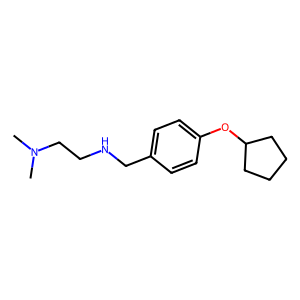

SMILES: CN(C)CCNCc(cc1)ccc1OC1CCCC1, Similarity: 0.4326710816777042


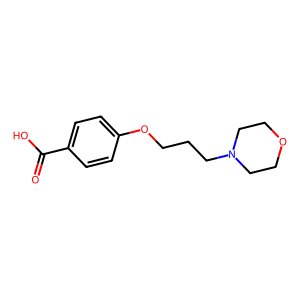

SMILES: OC(c(cc1)ccc1OCCCN1CCOCC1)=O, Similarity: 0.4407894736842105


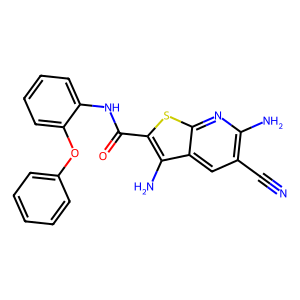

SMILES: Nc(c1c2)c(C(Nc(cccc3)c3Oc3ccccc3)=O)sc1nc(N)c2C#N, Similarity: 0.43650190114068443


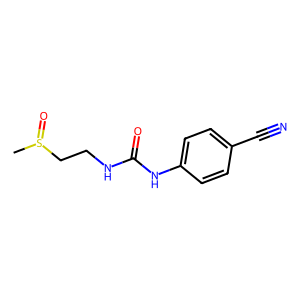

SMILES: CS(CCNC(Nc(cc1)ccc1C#N)=O)=O, Similarity: 0.4479638009049774


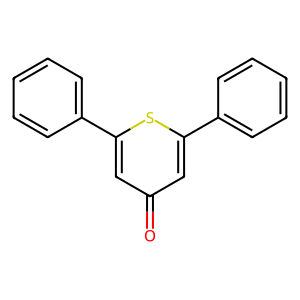

SMILES: O=C1C=C(c2ccccc2)SC(c2ccccc2)=C1, Similarity: 0.44782608695652176


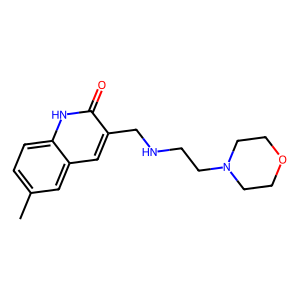

SMILES: Cc(cc1)cc(C=C2CNCCN3CCOCC3)c1NC2=O, Similarity: 0.4037685060565276


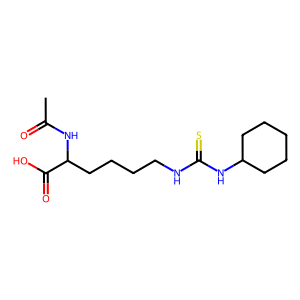

SMILES: CC(NC(CCCCNC(NC1CCCCC1)=S)C(O)=O)=O, Similarity: 0.45394736842105265


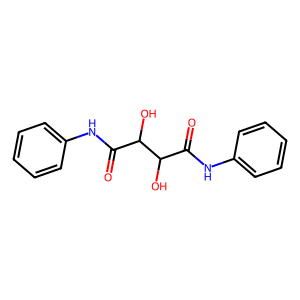

SMILES: OC(C(C(Nc1ccccc1)=O)O)C(Nc1ccccc1)=O, Similarity: 0.4517543859649123


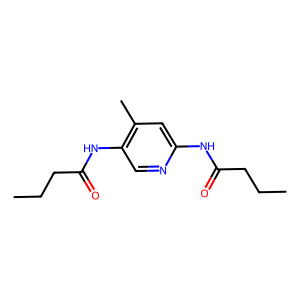

SMILES: CCCC(Nc(c(C)c1)cnc1NC(CCC)=O)=O, Similarity: 0.4


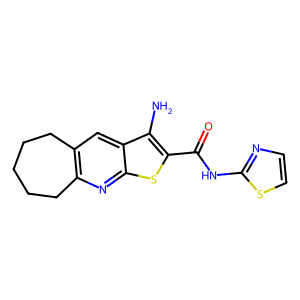

SMILES: Nc1c(C(Nc2nccs2)=O)sc2nc(CCCCC3)c3cc12, Similarity: 0.47517188693659285
Similar molecules and their similarities have been written to similar_molecules.csv


In [8]:
 # Search molecules in the databse
import pandas as pd
import sqlite3
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw
from IPython.display import display, Image
import os

def read_smiles_from_csv(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    return df['SMILES'].tolist()

def calculate_fingerprint(smiles):
    # Convert SMILES string to molecular object
    mol = Chem.MolFromSmiles(smiles)
    # Generate molecular fingerprint
    fp = FingerprintMols.FingerprintMol(mol)
    # Convert fingerprint to binary format
    return fp.ToBitString()

def calculate_tanimoto(fp1, fp2):
    # Convert fingerprint strings back to RDKit fingerprints
    fp1 = DataStructs.CreateFromBitString(fp1)
    fp2 = DataStructs.CreateFromBitString(fp2)
    # Calculate Tanimoto similarity
    return DataStructs.FingerprintSimilarity(fp1, fp2)

def find_similar_molecules(db_name, input_smiles, threshold=0.7):
    input_fp = calculate_fingerprint(input_smiles)
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # Retrieve all fingerprints from the database
    cursor.execute('SELECT smiles, fingerprint FROM molecules')
    rows = cursor.fetchall()
    
    similar_molecules = []
    for smiles, fingerprint in rows:
        similarity = calculate_tanimoto(input_fp, fingerprint)
        if similarity >= threshold:
            similar_molecules.append((smiles, similarity))
    
    conn.close()
    return similar_molecules

def display_molecule_images(similar_molecules):
    for smiles, similarity in similar_molecules:
        mol = Chem.MolFromSmiles(smiles)
        img = Draw.MolToImage(mol)
        display(img)
        print(f'SMILES: {smiles}, Similarity: {similarity}')

def write_similar_molecules_to_csv(similar_molecules, output_file):
    # Convert list of tuples to DataFrame
    df = pd.DataFrame(similar_molecules, columns=['SMILES', 'Similarity'])
    
    # Try writing to the specified file, create a new file if it fails
    try:
        df.to_csv(output_file, index=False)
    except IOError:
        new_file = generate_new_filename(output_file)
        print(f"Failed to write to {output_file}, creating new file: {new_file}")
        df.to_csv(new_file, index=False)

def generate_new_filename(original_file):
    base, ext = os.path.splitext(original_file)
    counter = 1
    new_file = f"{base}_{counter}{ext}"
    while os.path.exists(new_file):
        counter += 1
        new_file = f"{base}_{counter}{ext}"
    return new_file

# Example usage
db_name = 'asinex.db'  # Name of the existing SQLite database

# Input SMILES
input_smiles = input('Enter the input SMILES string: ')

# Set similarity threshold
threshold = float(input('Enter the similarity threshold (0.0 to 1.0): '))

# Find similar molecules
similar_molecules = find_similar_molecules(db_name, input_smiles, threshold)

# Write similar molecules to a CSV file
output_file = 'similar_molecules.csv'
write_similar_molecules_to_csv(similar_molecules, output_file)

# Display molecule images
display_molecule_images(similar_molecules)

print(f'Similar molecules and their similarities have been written to {output_file}')


In [ ]:
Cc1cc(C)c2c(N)csc2n1